# Стадия анализа данных

In [2]:
# Сменим рабочую дирректорию для удобства
import os
os.chdir('/home/slawa/HDD/my_scripts/my_otus/ML_advanced/lesson_9/hw')

In [3]:
# библиотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# загружаем данные
raw_data_file_name = 'data/raw_data/heart.csv'
raw_data = pd.read_csv(raw_data_file_name, delimiter=',', decimal='.')
raw_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


Описание полей

- age:
  - type: Numerical
  - Descrip:on: Age of the individual.
  - Range: [29, 77]
- sex:
  - Type: Categorical (Binary)
  - Descrip:on: Gender of the individual.
  - Categories:
  - `0`: Female
  - `1`: Male
- cp:
  - Type: Categorical
  - Descrip:on: Chest pain type experienced by the individual.
  - Categories:[0, 1, 2, 3]
- trestbps:
  - Type: Numerical
  - Descrip:on: Resting blood pressure (in mm Hg) upon admission to the hospital.
- chol:
  - Type: Numerical
  - Descrip:on: Serum cholesterol level in mg/dl.
- fbs:
  - Type: Categorical (Binary)
  - Descrip:on: Fasting blood sugar.
  - Categories:
  - `0`: < 120 mg/dl
  - `1`: > 120 mg/dl
- restecg:
  - Type: Categorical
  - Descrip:on: Resting electrocardiographic results.
  - Categories: [0, 1, 2]
- thalach:
  - Type: Numerical
  - Descrip:on: Maximum heart rate achieved during the Thallium stress test.
- exang:
  - Type: Categorical (Binary)
  - Descrip:on: Exercise-induced angina.
  - Categories:
  - `0`: No
  - `1`: Yes
- oldpeak:
  - Type: Numerical
  - Descrip:on: ST depression induced by exercise rela:ve to rest.
- slope:
  - Type: Categorical
  - Descrip:on: Slope of the peak exercise ST segment.
  - Categories: [0, 1, 2]
- ca:
  - Type: Numerical
  - Descrip:on: Number of major vessels colored by fluoroscopy.
- thal:
  - Type: Categorical
  - Descrip:on: Thalassemia type.
  - Categories: [1, 2, 3]
- target:
  - Type: Categorical (Binary)
  - Descrip:on: Diagnosis of heart disease.
  - Categories:
  - `0`: Absence of heart disease
  - `1`: Presence of heart disease

In [4]:
# смотрим пустые значения
raw_data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
# смотрим наличие дубликатов
raw_data.duplicated().any()

True

In [6]:
# удаляем дубликаты и проверяем еще раз
raw_data.drop_duplicates(inplace=True)
raw_data.duplicated().any()

False

In [7]:
# смотрим краткую сводку по данным
raw_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


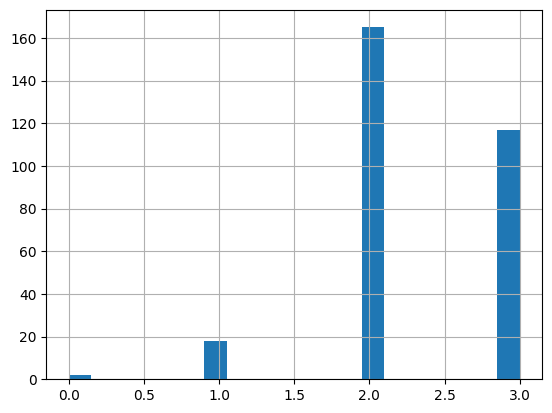

In [8]:
# смотрим баланс целевых классов
raw_data['thal'].hist(bins=20)
plt.show()

In [9]:
# исходя из описания датасета, класса 0 в поле thal не должно быть.
# удаляем
raw_data.drop(raw_data.loc[raw_data['thal'] == 0].index, inplace=True)

In [10]:
# считаем баланс классов
for thal in raw_data['thal'].unique():
    count = raw_data.loc[raw_data['thal'] == thal].shape[0]
    count_percent = count / raw_data.shape[0] * 100
    print(f'class {thal}: count {count}, percent {count_percent:.2f}%')

class 3: count 117, percent 39.00%
class 2: count 165, percent 55.00%
class 1: count 18, percent 6.00%


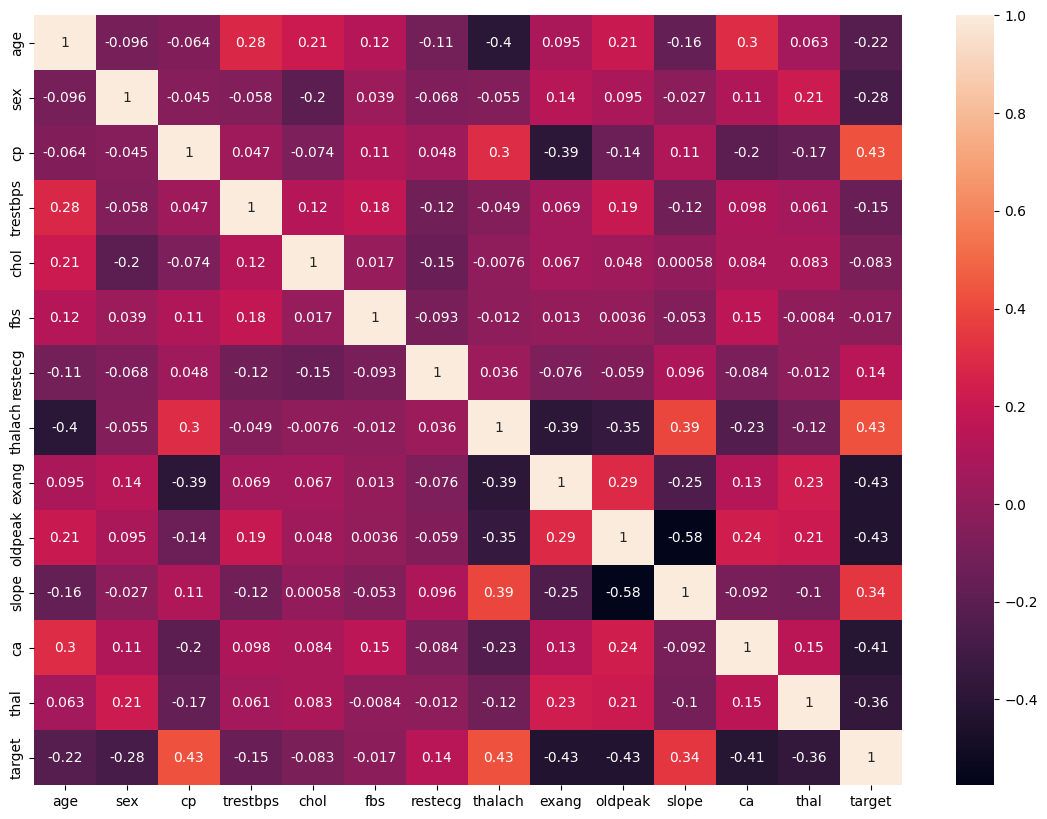

In [11]:
# посмотрим на корреляцию
plt.figure(figsize=(14,10))
sns.heatmap(raw_data.corr('pearson'), annot=True)
plt.show()

In [12]:
# разобьем поля по их типам
target_col = ['thal']
categorical_col = ['cp', 'restecg', 'slope']
numeric_col = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']
binary_col = ['sex', 'fbs', 'exang', 'target']
all_features = categorical_col + numeric_col + binary_col

In [13]:
# используя все данные из малого класса, попробуем сгенерировать синтетические данные
source_data = raw_data[raw_data['thal'] == 1]
sintetic_rows = 70
sintenic = dict()
for col in categorical_col + binary_col:
    sintenic.update({col: np.random.choice(source_data[col].unique(), size=sintetic_rows)})
for col in numeric_col:
    if col != 'oldpeak':
        sintenic.update(
            {
                col: np.abs(
                        np.random.normal(
                            loc=source_data[col].mean(),
                            scale=source_data[col].std(),
                            size=sintetic_rows
                        ).astype(int)
                    )
            }
        )
    else:
        sintenic.update(
            {
                col: np.around(
                        np.abs(
                            np.random.normal(
                                loc=source_data[col].mean(),
                                scale=source_data[col].std(),
                                size=sintetic_rows
                            )
                        ), 
                        1
                    )
            }
        )
sintenic['thal'] = np.full((sintetic_rows,), 1, dtype=int)
sintenic_data = pd.DataFrame(sintenic)
sintenic_data

,cp,restecg,slope,sex,fbs,exang,target,age,trestbps,chol,thalach,oldpeak,ca,thal
0,1,1,1,0,0,1,1,60,127,263,144,1.1,0,1
1,3,1,2,1,1,0,0,53,122,150,129,1.7,1,1
2,0,1,0,1,0,1,1,66,121,257,122,1.9,0,1
3,3,0,1,1,0,0,0,46,128,229,175,2.1,3,1
4,1,2,1,1,1,1,0,66,128,173,177,1.2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,2,0,0,1,1,1,1,51,143,183,133,1.1,0,1
66,0,1,0,1,1,0,0,52,138,246,140,2.6,0,1
67,0,2,0,1,0,0,1,52,158,107,154,1.8,1,1
68,0,2,2,1,1,0,0,53,127,253,129,1.9,1,1


In [14]:
# проверим, что в синтетических данных нет дублей
sintenic_data.duplicated().any()

False

In [15]:
# удаляем дубликаты и проверяем еще раз
sintenic_data.drop_duplicates(inplace=True)
sintenic_data.duplicated().any()

False

In [16]:
# разобъем исходные данные на части и спрячем тестовые данные.
# тестовые данные нам понадоботься только в окончательном тестировании модели
from sklearn.model_selection import train_test_split

data_train, data_test = train_test_split(raw_data, test_size=0.2, stratify=raw_data['thal'])
data_test.to_csv('data/test_data/test_clear_disbalance.csv', index=False)

In [17]:
#work_data = data_train.copy()

In [18]:
# соединяем оставшиеся данные и синтетические
work_data = pd.concat([data_train, sintenic_data])
work_data = work_data[all_features + target_col]
work_data

,cp,restecg,slope,age,trestbps,chol,thalach,oldpeak,ca,sex,fbs,exang,target,thal
171,0,0,0,56,130,283,103,1.6,0,1,1,1,0,3
23,2,0,2,63,135,252,172,0.0,0,0,0,0,1,2
69,0,0,0,62,160,164,145,6.2,3,0,0,0,0,3
451,1,1,1,49,134,271,162,0.0,0,0,0,0,1,2
280,1,0,1,45,130,234,175,0.6,0,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,2,0,0,51,143,183,133,1.1,0,1,1,1,1,1
66,0,1,0,52,138,246,140,2.6,0,1,1,0,0,1
67,0,2,0,52,158,107,154,1.8,1,1,0,0,1,1
68,0,2,2,53,127,253,129,1.9,1,1,1,0,0,1


In [19]:
# смотрим получившийся баланс классов
for thal in work_data['thal'].unique():
    count = work_data.loc[work_data['thal'] == thal].shape[0]
    count_percent = count / work_data.shape[0] * 100
    print(f'class {thal}: count {count}, percent {count_percent:.2f}%')

class 3: count 94, percent 30.32%
class 2: count 132, percent 42.58%
class 1: count 84, percent 27.10%


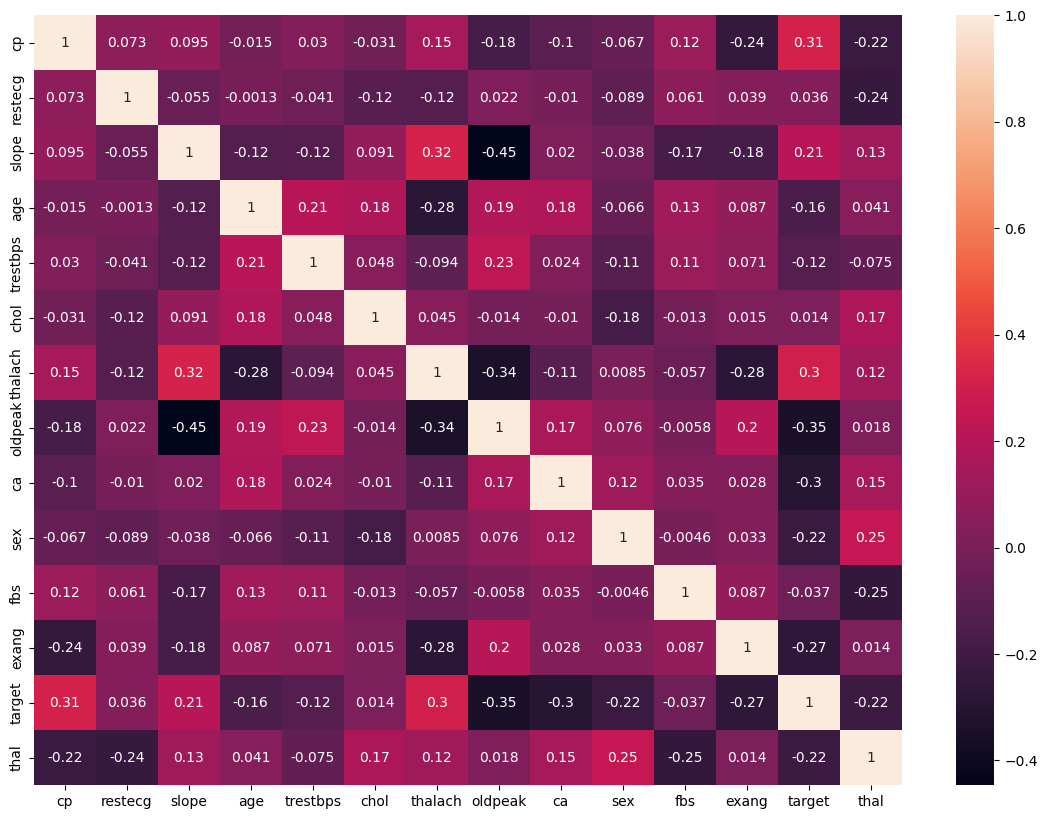

In [20]:
# посмотрим насколько синтетические данные повлияли на корреляцию
plt.figure(figsize=(14,10))
sns.heatmap(work_data.corr('pearson'), annot=True)
plt.show()

In [21]:
# сохраняем получившийся датасет
work_data.to_csv('data/train_data/work_data_with_sintetic.csv', index=False)

# Стадия первых моделей

In [22]:
# Сменим рабочую дирректорию для удобства
import os
os.chdir('/home/slawa/HDD/my_scripts/my_otus/ML_advanced/lesson_9/hw')

In [23]:
# библиотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, precision_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import f1_score, make_scorer
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
import xgboost

In [24]:
# данные
work_data_file_name = 'data/train_data/work_data_with_sintetic.csv'
work_data = pd.read_csv(work_data_file_name, delimiter=',', decimal='.')
work_data

,cp,restecg,slope,age,trestbps,chol,thalach,oldpeak,ca,sex,fbs,exang,target,thal
0,0,0,0,56,130,283,103,1.6,0,1,1,1,0,3
1,2,0,2,63,135,252,172,0.0,0,0,0,0,1,2
2,0,0,0,62,160,164,145,6.2,3,0,0,0,0,3
3,1,1,1,49,134,271,162,0.0,0,0,0,0,1,2
4,1,0,1,45,130,234,175,0.6,0,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,2,0,0,51,143,183,133,1.1,0,1,1,1,1,1
306,0,1,0,52,138,246,140,2.6,0,1,1,0,0,1
307,0,2,0,52,158,107,154,1.8,1,1,0,0,1,1
308,0,2,2,53,127,253,129,1.9,1,1,1,0,0,1


In [25]:
# разбиваем данные
df_train, df_test = train_test_split(work_data, test_size=0.2, stratify=work_data['thal'])

In [26]:
# разобьем поля по их типам
target_col = ['thal']
categorical_col = ['cp', 'restecg', 'slope']
numeric_col = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']
binary_col = ['sex', 'fbs', 'exang', 'target']
all_features = categorical_col + numeric_col + binary_col

In [27]:
# обучаем OneHotEncoder бля категоризации правильных ответов
target_ohe = OneHotEncoder()
target_ohe.fit(df_train[target_col])

Y_train = target_ohe.transform(df_train[target_col]).toarray()

In [28]:
# собираем данные для обучения
X_train = df_train[all_features]

In [29]:
# собираем конвейер
data_transformer = ColumnTransformer(
    [
        ("onehot", OneHotEncoder(handle_unknown="ignore"), categorical_col),
        ('scaler', StandardScaler(), numeric_col),
        ("as_is", "passthrough", binary_col)
    ]
)
preprocessor = Pipeline(steps=[("data_transformer", data_transformer)])

In [30]:
f1 = make_scorer(f1_score, average="macro")

## DecisionTreeClassifier

In [31]:
# собираем и обучаем дерево решений
classifier_pipline = Pipeline(
    steps=[('preprocessor', preprocessor),
           ('classifier', DecisionTreeClassifier())])
classifier_pipline
classifier_pipline.fit(X_train, Y_train)

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('data_transformer',
                                  ColumnTransformer(transformers=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'),
                                                                   ['cp',
                                                                    'restecg',
                                                                    'slope']),
                                                                  ('scaler',
                                                                   StandardScaler(),
                                                                   ['age',
                                                                    'trestbps',
                                                                    'chol',
                                                                    'thalach',
                                                                    'oldpeak',
                                                                    'ca']),
                                                                  ('as_is',
                                                                   'passthrough',
                                                                   ['sex',
                                                                    'fbs',
                                                                    'exang',
                                                                    'target'])]))])),
                ('classifier', DecisionTreeClassifier())])

In [32]:
# проверяем
preds = classifier_pipline.predict(df_test[all_features])
print(classification_report(target_ohe.transform(df_test[target_col]), preds))

              precision    recall  f1-score   support

           0       0.50      0.59      0.54        17
           1       0.64      0.69      0.67        26
           2       0.57      0.42      0.48        19

   micro avg       0.58      0.58      0.58        62
   macro avg       0.57      0.57      0.56        62
weighted avg       0.58      0.58      0.58        62
 samples avg       0.58      0.58      0.58        62



In [33]:
param_grid = {
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__max_depth': [2, 4, 6, 8, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__min_samples_split': [2, 5, 10]
}


search = GridSearchCV(classifier_pipline, param_grid, n_jobs=5, cv=10 , scoring=f1)

search.fit(X_train, Y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        Pipeline(steps=[('data_transformer',
                                                         ColumnTransformer(transformers=[('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'),
                                                                                          ['cp',
                                                                                           'restecg',
                                                                                           'slope']),
                                                                                         ('scaler',
                                                                                          StandardScaler(),
                                                                                          ['age',
                                                                                           'trestbps',
                                                                                           'chol',
                                                                                           'thalach',
                                                                                           'oldpeak',
                                                                                           'ca']),
                                                                                         ('as_is',
                                                                                          'passthrough',
                                                                                          ['sex',
                                                                                           'fbs',
                                                                                           'exang',
                                                                                           'target'])]))])),
                                       ('classifier',
                                        DecisionTreeClassifier())]),
             n_jobs=5,
             param_grid={'classifier__criterion': ['gini', 'entropy'],
                         'classifier__max_depth': [2, 4, 6, 8, 10],
                         'classifier__min_samples_leaf': [1, 2, 4],
                         'classifier__min_samples_split': [2, 5, 10]},
             scoring=make_scorer(f1_score, response_method='predict', average=macro))

In [34]:
# проверяем
preds = search.predict(df_test[all_features])
print(classification_report(target_ohe.transform(df_test[target_col]), preds))

              precision    recall  f1-score   support

           0       0.78      0.41      0.54        17
           1       0.63      0.65      0.64        26
           2       0.59      0.53      0.56        19

   micro avg       0.64      0.55      0.59        62
   macro avg       0.67      0.53      0.58        62
weighted avg       0.66      0.55      0.59        62
 samples avg       0.55      0.55      0.55        62



/home/slawa/HDD/my_scripts/my_otus/ML_advanced/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## RandomForestClassifier

In [35]:
# собираем и обучаем случайный лес
classifier_pipline = Pipeline(
    steps=[('preprocessor', preprocessor),
           ('classifier', RandomForestClassifier())])
classifier_pipline
classifier_pipline.fit(X_train, Y_train)

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('data_transformer',
                                  ColumnTransformer(transformers=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'),
                                                                   ['cp',
                                                                    'restecg',
                                                                    'slope']),
                                                                  ('scaler',
                                                                   StandardScaler(),
                                                                   ['age',
                                                                    'trestbps',
                                                                    'chol',
                                                                    'thalach',
                                                                    'oldpeak',
                                                                    'ca']),
                                                                  ('as_is',
                                                                   'passthrough',
                                                                   ['sex',
                                                                    'fbs',
                                                                    'exang',
                                                                    'target'])]))])),
                ('classifier', RandomForestClassifier())])

In [36]:
# проверяем
preds = classifier_pipline.predict(df_test[all_features])
print(classification_report(target_ohe.transform(df_test[target_col]), preds))

              precision    recall  f1-score   support

           0       0.83      0.59      0.69        17
           1       0.86      0.73      0.79        26
           2       0.65      0.58      0.61        19

   micro avg       0.78      0.65      0.71        62
   macro avg       0.78      0.63      0.70        62
weighted avg       0.79      0.65      0.71        62
 samples avg       0.65      0.65      0.65        62



/home/slawa/HDD/my_scripts/my_otus/ML_advanced/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [37]:
param_grid = {
    'classifier__n_estimators'      : [320,330,340],
    'classifier__max_depth'         : [8, 9, 10, 11, 12],
    'classifier__random_state'      : [0],
    'classifier__max_features': ['sqrt', 'log2'],
    'classifier__class_weight': ['balanced', 'balanced_subsample'],
}


search = GridSearchCV(classifier_pipline, param_grid, n_jobs=5, cv=10 , scoring=f1)

search.fit(X_train, Y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        Pipeline(steps=[('data_transformer',
                                                         ColumnTransformer(transformers=[('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'),
                                                                                          ['cp',
                                                                                           'restecg',
                                                                                           'slope']),
                                                                                         ('scaler',
                                                                                          StandardScaler(),
                                                                                          ['age',
                                                                                           'trestbps',
                                                                                           'chol',
                                                                                           'thalach',
                                                                                           'oldpeak',
                                                                                           'ca']),
                                                                                         ('as_is',
                                                                                          'passthrough',
                                                                                          ['sex',
                                                                                           'fbs',
                                                                                           'exang',
                                                                                           'target'])]))])),
                                       ('classifier',
                                        RandomForestClassifier())]),
             n_jobs=5,
             param_grid={'classifier__class_weight': ['balanced',
                                                      'balanced_subsample'],
                         'classifier__max_depth': [8, 9, 10, 11, 12],
                         'classifier__max_features': ['sqrt', 'log2'],
                         'classifier__n_estimators': [320, 330, 340],
                         'classifier__random_state': [0]},
             scoring=make_scorer(f1_score, response_method='predict', average=macro))

In [38]:
# проверяем
preds = search.predict(df_test[all_features])
print(classification_report(target_ohe.transform(df_test[target_col]), preds))

              precision    recall  f1-score   support

           0       0.89      0.47      0.62        17
           1       0.83      0.73      0.78        26
           2       0.62      0.53      0.57        19

   micro avg       0.77      0.60      0.67        62
   macro avg       0.78      0.58      0.65        62
weighted avg       0.78      0.60      0.67        62
 samples avg       0.60      0.60      0.60        62



/home/slawa/HDD/my_scripts/my_otus/ML_advanced/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## XGBClassifier

In [39]:
# собираем и обучаем
classifier_pipline = Pipeline(
    steps=[('preprocessor', preprocessor),
           ('classifier', xgboost.XGBClassifier())])
classifier_pipline
classifier_pipline.fit(X_train, Y_train)

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('data_transformer',
                                  ColumnTransformer(transformers=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'),
                                                                   ['cp',
                                                                    'restecg',
                                                                    'slope']),
                                                                  ('scaler',
                                                                   StandardScaler(),
                                                                   ['age',
                                                                    'trestbps',
                                                                    'chol',
                                                                    'thalach',
                                                                    'oldpeak',
                                                                    'ca']),
                                                                  ('as_is',
                                                                   'passthrough',
                                                                   ['sex',
                                                                    'fbs',
                                                                    'exang',
                                                                    'target'])]))])),
                ('classifier',
                 XGBClassifier(base_sc...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [40]:
# проверяем
preds = classifier_pipline.predict(df_test[all_features])
print(classification_report(target_ohe.transform(df_test[target_col]), preds))

              precision    recall  f1-score   support

           0       0.77      0.59      0.67        17
           1       0.80      0.77      0.78        26
           2       0.58      0.58      0.58        19

   micro avg       0.72      0.66      0.69        62
   macro avg       0.72      0.65      0.68        62
weighted avg       0.72      0.66      0.69        62
 samples avg       0.64      0.66      0.65        62



/home/slawa/HDD/my_scripts/my_otus/ML_advanced/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## LinearSVC

In [41]:
# собираем и обучаем
classifier_pipline = Pipeline(
    steps=[('preprocessor', preprocessor),
           ('classifier', LinearSVC())])
classifier_pipline
classifier_pipline.fit(X_train, df_train[target_col]-1)

/home/slawa/HDD/my_scripts/my_otus/ML_advanced/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/slawa/HDD/my_scripts/my_otus/ML_advanced/venv/lib/python3.11/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('data_transformer',
                                  ColumnTransformer(transformers=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'),
                                                                   ['cp',
                                                                    'restecg',
                                                                    'slope']),
                                                                  ('scaler',
                                                                   StandardScaler(),
                                                                   ['age',
                                                                    'trestbps',
                                                                    'chol',
                                                                    'thalach',
                                                                    'oldpeak',
                                                                    'ca']),
                                                                  ('as_is',
                                                                   'passthrough',
                                                                   ['sex',
                                                                    'fbs',
                                                                    'exang',
                                                                    'target'])]))])),
                ('classifier', LinearSVC())])

In [42]:
# проверяем
preds = classifier_pipline.predict(df_test[all_features])
print(classification_report(df_test[target_col]-1, preds))

              precision    recall  f1-score   support

           0       0.67      0.59      0.62        17
           1       0.76      0.73      0.75        26
           2       0.59      0.68      0.63        19

    accuracy                           0.68        62
   macro avg       0.67      0.67      0.67        62
weighted avg       0.68      0.68      0.68        62



## Stacking

In [43]:
estimators = [
    ("Random_Forest", RandomForestClassifier()),
    ("Xgboost", xgboost.XGBClassifier()),
    ("SVM", LinearSVC()),
    
]

stacking_classifier = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(n_jobs=-1, verbose=True),
    n_jobs=-1,
    verbose=True,
)

# собираем и обучаем
classifier_pipline = Pipeline(
    steps=[('preprocessor', preprocessor),
           ('classifier', stacking_classifier)])
classifier_pipline
classifier_pipline.fit(X_train, df_train[target_col]-1)

NameError: name 'StackingClassifier' is not defined

In [ ]:
# проверяем
preds = classifier_pipline.predict(df_test[all_features])
print(classification_report(df_test[target_col]-1, preds))

              precision    recall  f1-score   support

           0       0.81      0.76      0.79        17
           1       0.67      0.77      0.71        26
           2       0.62      0.53      0.57        19

    accuracy                           0.69        62
   macro avg       0.70      0.69      0.69        62
weighted avg       0.69      0.69      0.69        62

